Practico 2

In [1]:
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt

1. Production and Recording 

In [46]:
fs = 48e3 # [kHz]
duration = 1 # [s]
t = np.linspace(0,duration, int(fs*duration), endpoint=False)
u_dict = {}

1.a) The Voice

1.b) Music

1.c) rectangular signal

In [47]:
a = 1
f = 100
u_rec = a*np.sign(np.sin(2*np.pi*f*t))
u_dict['u_rec'] = u_rec

1.d) linear sweep

In [48]:
f_0 = 20
f_1 = 20e3
k = (f_1-f_0)/duration # T?
u_l = np.sin(2*np.pi*f_0 + np.pi*k*t**2)
u_dict['u_l'] = u_l

1.e) exponential sweep

In [49]:
f_0 = 20
f_1 = 20e3
k = (f_1-f_0)**(1/duration) 
u_e = np.sin(2*np.pi*f_0*((k**t)-1)/np.log(k))
u_dict['u_e'] = u_e

1.f) white noise with zero mean

In [50]:
u_wn = np.random.normal(0,1, len(t))
u_dict['u_wn'] = u_wn

In [54]:
# play the sounds:
sd.play(u_wn, samplerate=fs)
sd.wait()


(0.0, 0.2)

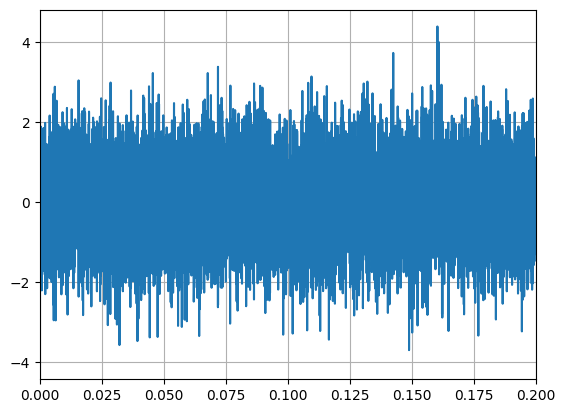

In [35]:
plt.figure()
plt.plot(t,u_wn)
plt.grid(True)
plt.xlim(0, 20*1/f)

2. Best signal for estimation
Question should we put a window over it for improvement?

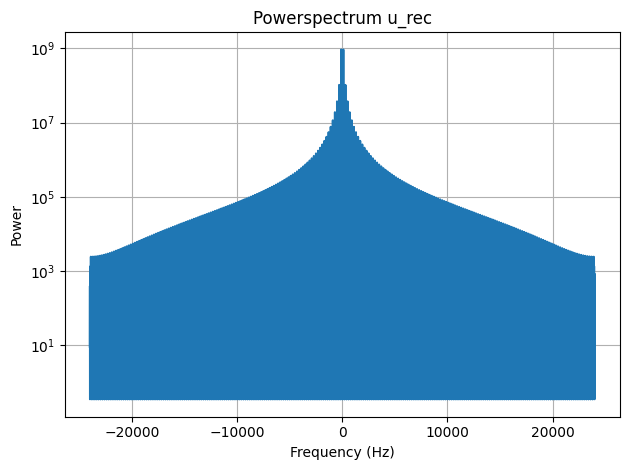

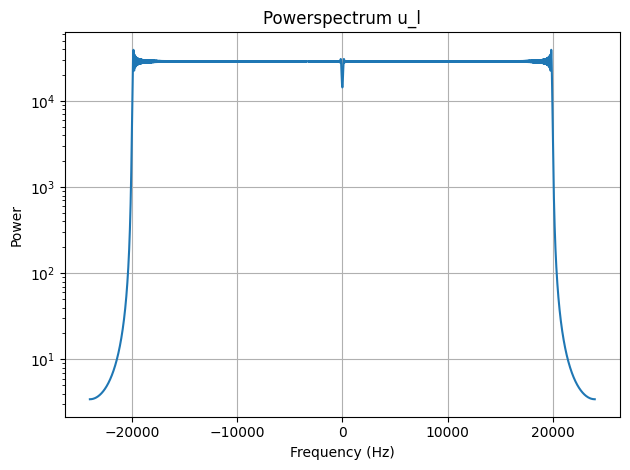

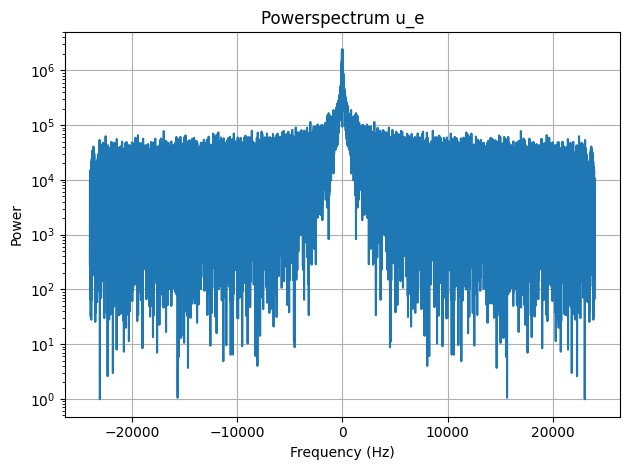

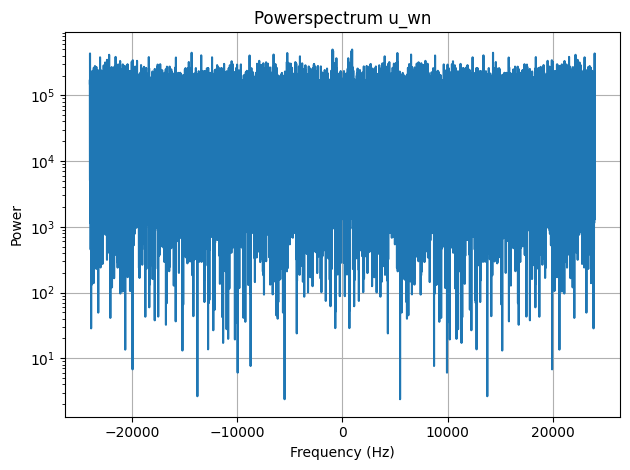

In [53]:
# calculate powerspectrum of the different input signals
f = np.fft.fftshift(np.fft.fftfreq(len(t), d=1/fs)) 
for key, u in u_dict.items():
    U = np.fft.fft(u)
    R_u = U * np.conj(U)
    R_u = np.fft.fftshift(np.abs(R_u))
    plt.figure()
    plt.semilogy(f, R_u)
    plt.title(f"Powerspectrum {key}")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power")
    plt.grid(True)
    plt.tight_layout()



3.
for u_l 
h is a linear filter


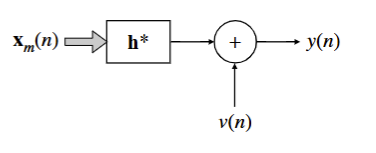

In [ ]:
# MSE J_o(M)
h = [] # regression vector (unknown parameter vector of the model) with dim(h) = m

J_o = var_v**2+(h.H*R_m*h-w_o.H*R*w_o)